# Information Warfare
## Russia’s use of Twitter during the 2016 US Presidential Election
---

### Import libraries

In [97]:
import numpy as np
import pandas as pd

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)
get_ipython().config.get('IPKernelApp', {})['parent_appname'] = ""

import spacy
import os
import pickle

from collections import Counter

from plotly import tools
import plotly.graph_objs as go
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# import plotly.offline as py

from plotly.offline import init_notebook_mode, plot, iplot
import plotly.io as pio

from IPython.display import Image

init_notebook_mode(connected=True)

### Import data

In [98]:
# All Tweets
df = pd.read_pickle('data/raw/tweets.pkl')
df.reset_index(drop = True, inplace = True)

# Only English language Tweets
dfEng = pd.read_pickle('data/raw/tweetsEng.pkl')
dfEng.reset_index(drop = True, inplace = True)

# Only non-English language Tweets
dfOth = pd.read_pickle('data/raw/tweetsOth.pkl')
dfOth.reset_index(drop = True, inplace = True)


### Inspect data

There are two sets of labels the Clemson researchers created: account type and account category. This project focuses on the account category label. 

**Note:** The labeling method employed by the Clemson researchers allows for accounts that primarily tweet in English to be labeled with a *Non-English* account category. For example, an account that primarily tweets about international events, such as the war in Ukraine, would be labeled as Non-English, even if the text is in English.

In [99]:
# All Tweets
print("All Tweets: \n {:,} rows of data, with {} observations for each row \n {:,} unique accounts \n \n Account types: {} \n Account categories: {} \n".format(df.shape[0], df.shape[1],len(set(df.author)),list(set(df.account_type)),list(set(df.account_category))))


All Tweets: 
 2,946,207 rows of data, with 21 observations for each row 
 2,843 unique accounts 
 
 Account types: ['Koch', 'French', 'Ukranian', 'Right', 'Uzbek', '?', 'Commercial', 'Spanish', 'Russian', 'Left', 'local', 'news', 'German', 'Arabic', 'Hashtager', 'Italian', 'Ebola ', 'ZAPOROSHIA', 'Portuguese'] 
 Account categories: ['Unknown', 'HashtagGamer', 'RightTroll', 'NewsFeed', 'Commercial', 'Fearmonger', 'NonEnglish', 'LeftTroll'] 



In [100]:
# Only English language Tweets
print("English Tweets: \n {:,} rows of data, with {} observations for each row \n {:,} unique accounts \n \n Account types: {} \n \n Account categories: {} \n".format(dfEng.shape[0], dfEng.shape[1],len(set(dfEng.author)),list(set(dfEng.account_type)),list(set(dfEng.account_category))))


English Tweets: 
 2,116,867 rows of data, with 21 observations for each row 
 2,161 unique accounts 
 
 Account types: ['Koch', 'French', 'Right', '?', 'Commercial', 'Spanish', 'Russian', 'Left', 'local', 'news', 'German', 'Arabic', 'Hashtager', 'Italian', 'Ebola ', 'ZAPOROSHIA', 'Portuguese'] 
 
 Account categories: ['Unknown', 'HashtagGamer', 'RightTroll', 'NewsFeed', 'Commercial', 'Fearmonger', 'NonEnglish', 'LeftTroll'] 



In [101]:
# Only non-English language Tweets
print("Non-English Tweets: \n {:,} rows of data, with {} observations for each row \n {:,} unique accounts \n \n Account types: {} \n \n Account categories: {} \n".format(dfOth.shape[0], dfOth.shape[1],len(set(dfOth.author)),list(set(dfOth.account_type)),list(set(dfOth.account_category))))


Non-English Tweets: 
 829,340 rows of data, with 21 observations for each row 
 2,360 unique accounts 
 
 Account types: ['Koch', 'French', 'Ukranian', 'Right', 'Uzbek', '?', 'Commercial', 'Spanish', 'Russian', 'Left', 'local', 'news', 'German', 'Arabic', 'Hashtager', 'Italian', 'Ebola ', 'ZAPOROSHIA', 'Portuguese'] 
 
 Account categories: ['Unknown', 'HashtagGamer', 'RightTroll', 'NewsFeed', 'Commercial', 'Fearmonger', 'NonEnglish', 'LeftTroll'] 



## Number of Tweets by Account Category (All Tweets)

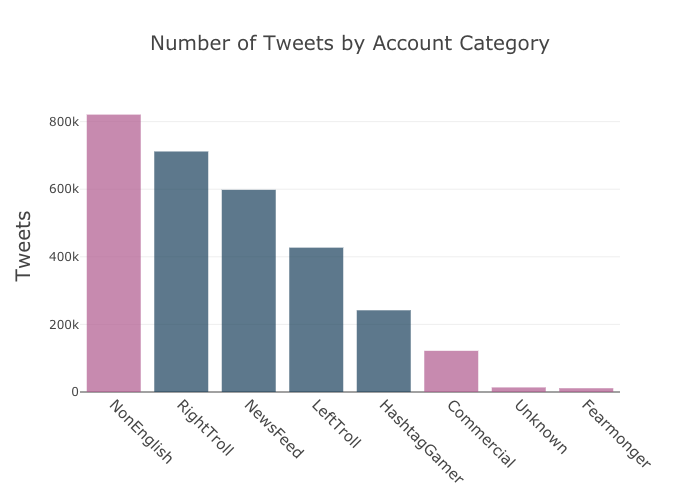

In [104]:
counts_by_type_A = dict(Counter(df.account_category))

account_type_A = list(counts_by_type_A.keys())
values_A = list(counts_by_type_A.values())

account_type_A = [x for _,x in sorted(zip(values_A ,account_type_A), reverse = True)]
values_A = sorted(values_A, reverse = True)

other_color = ['Unknown', 'Commercial', 'NonEnglish', 'Fearmonger']

color_list = ['rgb(175, 88, 141)' if i in other_color else 'rgb(23,62,90)' for i in account_type_A]

data = [go.Bar(
            x=account_type_A,
            y=values_A,
            marker = dict(color = color_list),
            opacity = .7
    )]

layout = go.Layout(title = dict(text = 'Number of Tweets by Account Category', font = dict(size = 20)), 
                   xaxis = dict(
                       tickangle = 45, 
                       tickfont = dict(size = 15),
                       automargin = True),
                  yaxis = dict(title = dict(text = 'Tweets', font = dict(size = 20))))

fig = go.Figure(data = data, layout = layout)

img_bytes = pio.to_image(fig, format='png')
Image(img_bytes)

# py.iplot(fig, filename='basic-bar')

## Number of Tweets by Account Category (English language Tweets)

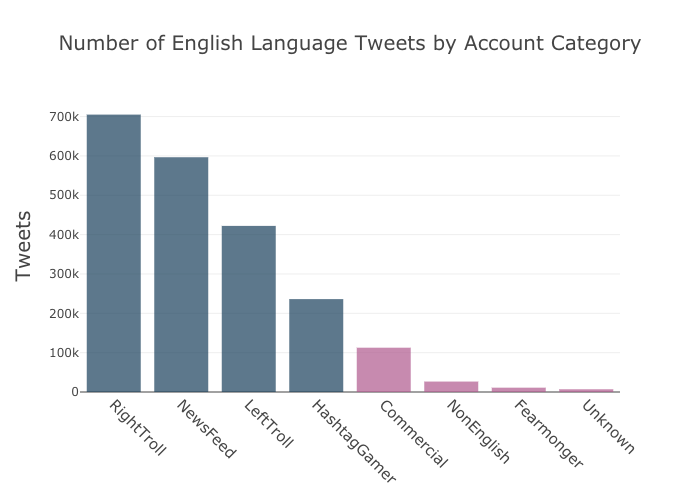

In [105]:
counts_by_type_B = dict(Counter(dfEng.account_category))

account_type_B = list(counts_by_type_B.keys())
values_B = list(counts_by_type_B.values())

account_type_B = [x for _,x in sorted(zip(values_B ,account_type_B), reverse = True)]
values_B = sorted(values_B, reverse = True)

other_color = ['Unknown', 'Commercial', 'NonEnglish', 'Fearmonger']

color_list = ['rgb(175, 88, 141)' if i in other_color else 'rgb(23,62,90)' for i in account_type_B]

data = [go.Bar(
            x=account_type_B,
            y=values_B,
            marker = dict(color = color_list),
            opacity = .7
    )]

layout = go.Layout(title = dict(text = 'Number of English Language Tweets by Account Category', font = dict(size = 20)), 
                   xaxis = dict(
                       tickangle = 45, 
                       tickfont = dict(size = 15),
                       automargin = True),
                  yaxis = dict(title = dict(text = 'Tweets', font = dict(size = 20))))

fig = go.Figure(data = data, layout = layout)

img_bytes = pio.to_image(fig, format='png')
Image(img_bytes)

# py.iplot(fig, filename='basic-bar')

## Number of Tweets by Account Category (Non-English Language Tweets)

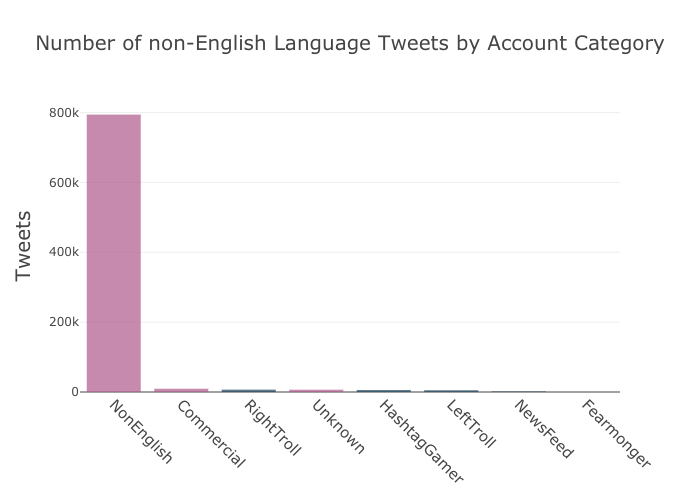

In [107]:
counts_by_type_C = dict(Counter(dfOth.account_category))

account_type_C = list(counts_by_type_C.keys())
values_C = list(counts_by_type_C.values())

account_type_C = [x for _,x in sorted(zip(values_C ,account_type_C), reverse = True)]
values_C = sorted(values_C, reverse = True)

other_color = ['Unknown', 'Commercial', 'NonEnglish', 'Fearmonger']

color_list = ['rgb(175, 88, 141)' if i in other_color else 'rgb(23,62,90)' for i in account_type_C]

data = [go.Bar(
            x=account_type_C,
            y=values_C,
            marker = dict(color = color_list),
            opacity = .7
    )]

layout = go.Layout(title = dict(text = 'Number of non-English Language Tweets by Account Category', font = dict(size = 20)), 
                   xaxis = dict(
                       tickangle = 45, 
                       tickfont = dict(size = 15),
                       automargin = True),
                  yaxis = dict(title = dict(text = 'Tweets', font = dict(size = 20))))

fig = go.Figure(data = data, layout = layout)

img_bytes = pio.to_image(fig, format='png')
Image(img_bytes)

# py.iplot(fig, filename='basic-bar')

### Number of Tweets by Account Category (English vs Non-English)

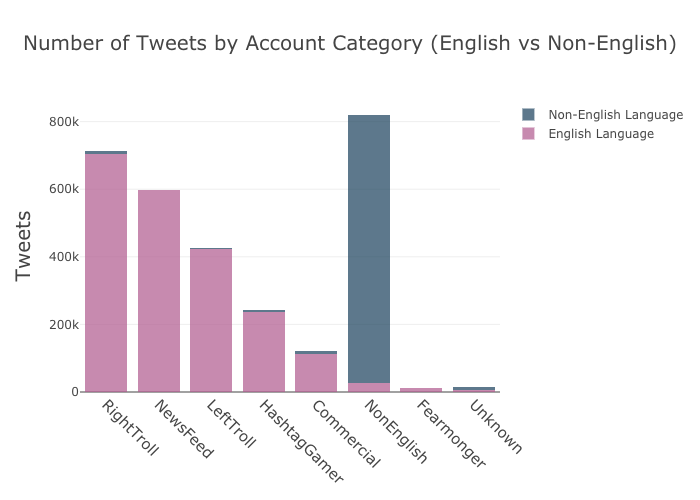

In [108]:
trace1 = go.Bar(
    x = account_type_B,
    y = values_B,
    name ='English Language',
    marker=dict(color='rgb(175, 88, 141)'),
    opacity = .7
)

trace2 = go.Bar(
    x=account_type_C,
    y=values_C,
    name='Non-English Language',
    marker=dict(color='rgb(23,62,90)'),
    opacity = .7
)

data = [trace1, trace2]

layout = go.Layout(
    title = dict(text = 'Number of Tweets by Account Category (English vs Non-English)', font = dict(size = 20)),
    xaxis = dict(
        tickangle = 45, 
        tickfont = dict(size = 15),
        automargin = True),
    yaxis = dict(title = dict(text = 'Tweets', font = dict(size = 20))),
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)

img_bytes = pio.to_image(fig, format='png')
Image(img_bytes)

# py.iplot(fig, filename='bar2.html')

---
### Number of Accounts by Account Category

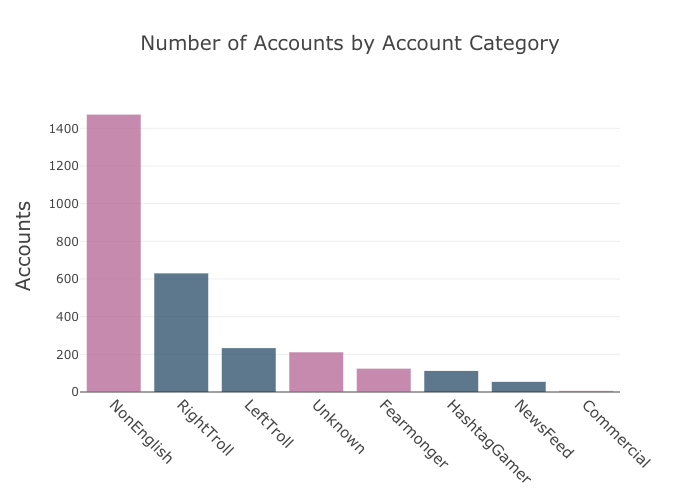

In [109]:
account_analysis_D = df.groupby(['author', 'account_category'])['content'].count().reset_index()

account_analysis_D = Counter(account_analysis_D.account_category)

account_type_D = list(account_analysis_D.keys())
values_D = list(account_analysis_D.values())

account_type_D = [x for _,x in sorted(zip(values_D ,account_type_D), reverse = True)]
values_D = sorted(values_D, reverse = True)

color_list = ['rgb(175, 88, 141)' if i in other_color else 'rgb(23,62,90)' for i in account_type_D]

data = [go.Bar(
            x=account_type_D,
            y=values_D,
            marker = dict(color = color_list),
            opacity = .7
    )]

layout = go.Layout(title = dict(text = 'Number of Accounts by Account Category', font = dict(size = 20)), 
                   xaxis = dict(
                       tickangle = 45, 
                       tickfont = dict(size = 15),
                       automargin = True),
                  yaxis = dict(title = dict(text = 'Accounts', font = dict(size = 20))))

fig = go.Figure(data = data, layout = layout)
img_bytes = pio.to_image(fig, format='png')
Image(img_bytes)

# py.iplot(fig, filename='bar2.html')

### Number of English Language Accounts by Account Category

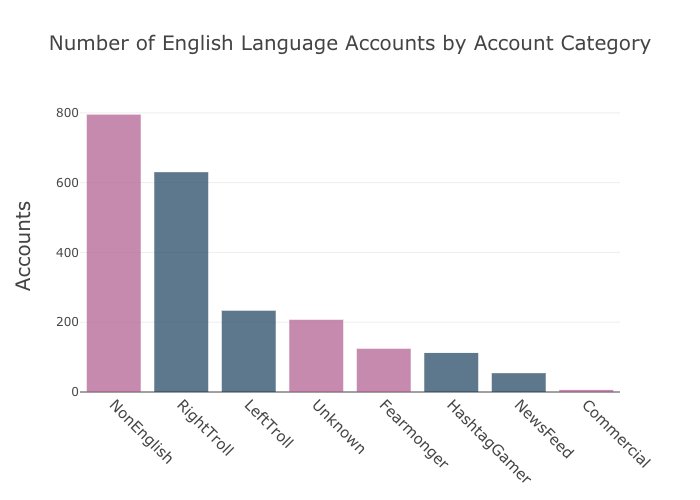

In [110]:
account_analysis_E = dfEng.groupby(['author', 'account_category'])['content'].count().reset_index()

account_analysis_E = Counter(account_analysis_E.account_category)

account_type_E = list(account_analysis_E.keys())
values_E = list(account_analysis_E.values())

account_type_E = [x for _,x in sorted(zip(values_E ,account_type_E), reverse = True)]
values_E = sorted(values_E, reverse = True)

color_list = ['rgb(175, 88, 141)' if i in other_color else 'rgb(23,62,90)' for i in account_type_E]

data = [go.Bar(
            x=account_type_E,
            y=values_E,
            marker = dict(color = color_list),
            opacity = .7
    )]

layout = go.Layout(title = dict(text = 'Number of English Language Accounts by Account Category', font = dict(size = 20)), 
                   xaxis = dict(
                       tickangle = 45, 
                       tickfont = dict(size = 15),
                       automargin = True),
                  yaxis = dict(title = dict(text = 'Accounts', font = dict(size = 20))))

fig = go.Figure(data = data, layout = layout)
img_bytes = pio.to_image(fig, format='png')
Image(img_bytes)

# py.iplot(fig, filename='bar2.html')

### Number of non-English Language Accounts by Account Category

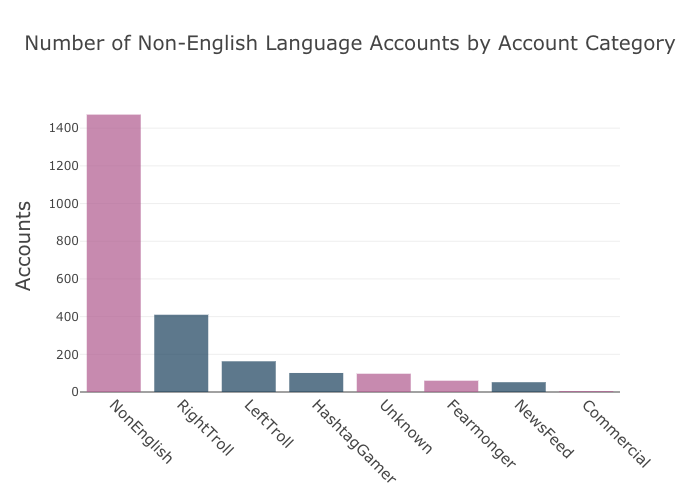

In [111]:
account_analysis_F = dfOth.groupby(['author', 'account_category'])['content'].count().reset_index()

account_analysis_F = Counter(account_analysis_F.account_category)

account_type_F = list(account_analysis_F.keys())
values_F = list(account_analysis_F.values())

account_type_F = [x for _,x in sorted(zip(values_F ,account_type_F), reverse = True)]
values_F = sorted(values_F, reverse = True)

color_list = ['rgb(175, 88, 141)' if i in other_color else 'rgb(23,62,90)' for i in account_type_F]

data = [go.Bar(
            x=account_type_F,
            y=values_F,
            marker = dict(color = color_list),
            opacity = .7
    )]

layout = go.Layout(title = dict(text = 'Number of Non-English Language Accounts by Account Category', font = dict(size = 20)), 
                   xaxis = dict(
                       tickangle = 45, 
                       tickfont = dict(size = 15),
                       automargin = True),
                  yaxis = dict(title = dict(text = 'Accounts', font = dict(size = 20))))

fig = go.Figure(data = data, layout = layout)
img_bytes = pio.to_image(fig, format='png')
Image(img_bytes)

# py.iplot(fig, filename='bar2.html')

### Number of Accounts by Account Category (English vs Non-English)

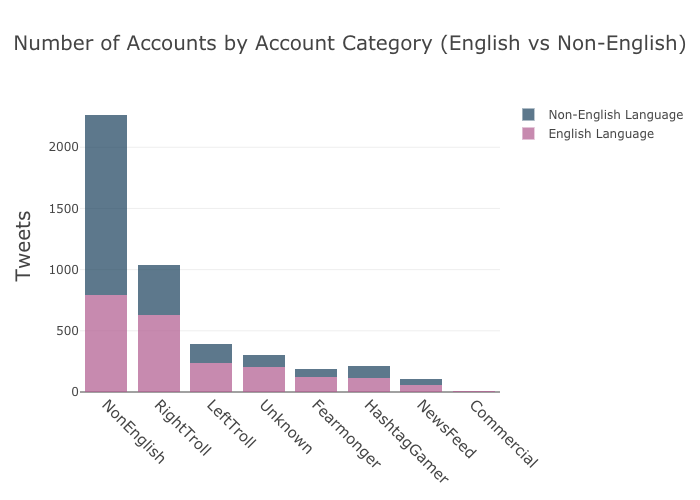

In [112]:
trace3 = go.Bar(
    x = account_type_E,
    y = values_E,
    name ='English Language',
    marker=dict(color='rgb(175, 88, 141)'),
    opacity = .7
)

trace4 = go.Bar(
    x=account_type_F,
    y=values_F,
    name='Non-English Language',
    marker=dict(color='rgb(23,62,90)'),
    opacity = .7
)

data = [trace3, trace4]

layout = go.Layout(
    title = dict(text = 'Number of Accounts by Account Category (English vs Non-English)', font = dict(size = 20)),
    xaxis = dict(
        tickangle = 45, 
        tickfont = dict(size = 15),
        automargin = True),
    yaxis = dict(title = dict(text = 'Tweets', font = dict(size = 20))),
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
img_bytes = pio.to_image(fig, format='png')
Image(img_bytes)

# py.iplot(fig, filename='bar2.html')

---
### Determine number of accounts with more than set number of Tweets

For our procedure to work, we need to make sure that we have enough information (tweets) for each account for doc2vec to appropriatly embed our text in a vector space. As such, we need to ensure that we only consider accounts that meet some threshold for a minimum number of tweets, which we we do below. 

It should be noted that the choice of 400 tweets is arbitraryl by setting this threshold, the amount of non-English accounts in the dataset has decreased considerably. 

In [25]:
# Let's get counts of the number of tweets by each author
counts_by_author = df[['author', 'content']].groupby('author').count()
counts_by_author.reset_index(inplace = True)

print('Number of accounts with more than 400 tweets:', sum(counts_by_author.content > 400))

author_series = counts_by_author.author[counts_by_author.content > 400]
df = df[df.author.isin(author_series)]

# English language Tweets
counts_by_author = dfEng[['author', 'content']].groupby('author').count()
counts_by_author.reset_index(inplace = True)

print('Number of English language accounts with more than 400 tweets:', sum(counts_by_author.content > 400))

author_series = counts_by_author.author[counts_by_author.content > 400]
dfEng = dfEng[dfEng.author.isin(author_series)]

# Non-English language Tweets
counts_by_author = dfOth[['author', 'content']].groupby('author').count()
counts_by_author.reset_index(inplace = True)

print('Number of non-English language accounts with more than 400 tweets:', sum(counts_by_author.content > 400))

author_series = counts_by_author.author[counts_by_author.content > 400]
dfOth = dfOth[dfOth.author.isin(author_series)]

Number of accounts with more than 400 tweets: 1138
Number of English language accounts with more than 400 tweets: 463
Number of non-English language accounts with more than 400 tweets: 678


### All accounts with more than 400 Tweets

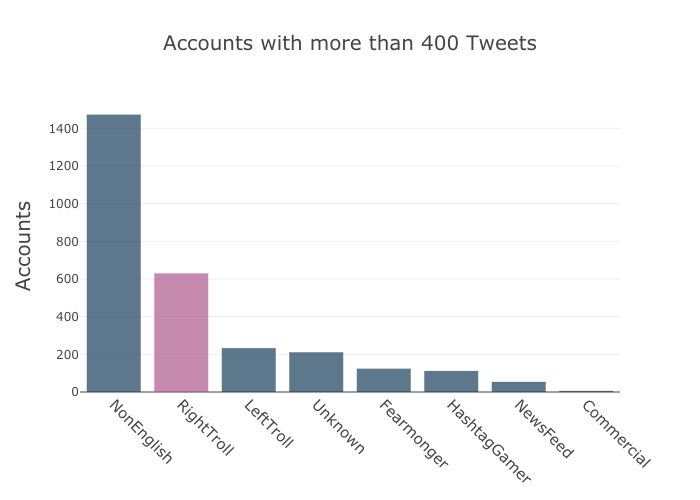

In [113]:
account_analysis = df.groupby(['author', 'account_category'])['content'].count().reset_index()
account_analysis = Counter(account_analysis.account_category)

account_type = list(account_analysis.keys())
values = list(account_analysis.values())

account_type_G = [x for _,x in sorted(zip(values ,account_type), reverse = True)]
values_G = sorted(values, reverse = True)

color_list = ['rgb(175, 88, 141)' if i == 'NonEnglish' else 'rgb(23,62,90)' for i in account_type]

data = [go.Bar(
            x=account_type_G,
            y=values_G,
            marker = dict(color = color_list),
            opacity = .7
    )]

layout = go.Layout(title = dict(text = 'Accounts with more than 400 Tweets', font = dict(size = 20)), 
                   xaxis = dict(
                       tickangle = 45, 
                       tickfont = dict(size = 15),
                       automargin = True),
                  yaxis = dict(title = dict(text = 'Accounts', font = dict(size = 20))))

fig = go.Figure(data = data, layout = layout)
img_bytes = pio.to_image(fig, format='png')
Image(img_bytes)

# py.iplot(fig, filename='bar2.html')

### English Language accounts with more than 400 Tweets

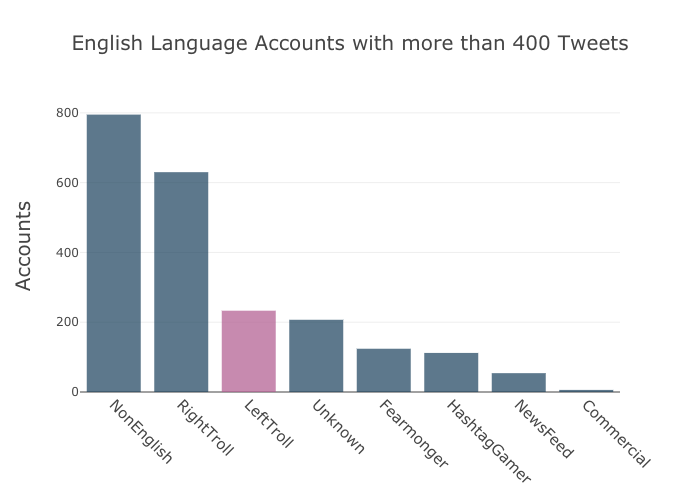

In [114]:
account_analysis = dfEng.groupby(['author', 'account_category'])['content'].count().reset_index()
account_analysis = Counter(account_analysis.account_category)

account_type = list(account_analysis.keys())
values = list(account_analysis.values())

account_type_H = [x for _,x in sorted(zip(values ,account_type), reverse = True)]
values_H = sorted(values, reverse = True)

color_list = ['rgb(175, 88, 141)' if i == 'NonEnglish' else 'rgb(23,62,90)' for i in account_type]

data = [go.Bar(
            x=account_type_H,
            y=values_H,
            marker = dict(color = color_list),
            opacity = .7
    )]

layout = go.Layout(title = dict(text = 'English Language Accounts with more than 400 Tweets', font = dict(size = 20)), 
                   xaxis = dict(
                       tickangle = 45, 
                       tickfont = dict(size = 15),
                       automargin = True),
                  yaxis = dict(title = dict(text = 'Accounts', font = dict(size = 20))))

fig = go.Figure(data = data, layout = layout)
img_bytes = pio.to_image(fig, format='png')
Image(img_bytes)

# py.iplot(fig, filename='bar2.html')

### Non-English Language Accounts with more than 400 Tweets

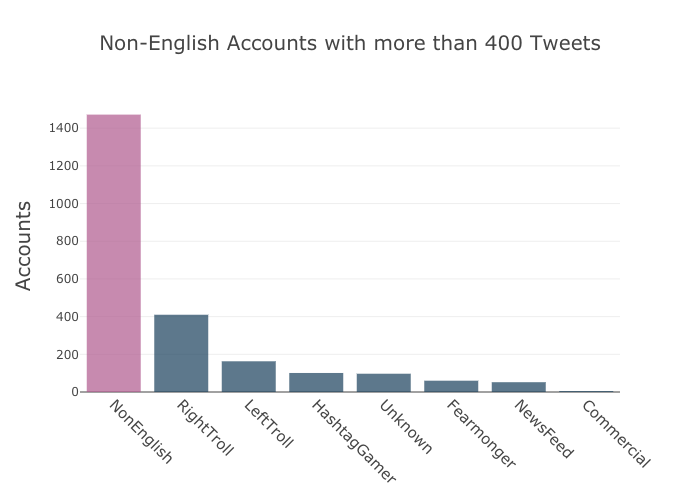

In [115]:
account_analysis = dfOth.groupby(['author', 'account_category'])['content'].count().reset_index()
account_analysis = Counter(account_analysis.account_category)

account_type = list(account_analysis.keys())
values = list(account_analysis.values())

account_type_I = [x for _,x in sorted(zip(values ,account_type), reverse = True)]
values_I = sorted(values, reverse = True)

color_list = ['rgb(175, 88, 141)' if i == 'NonEnglish' else 'rgb(23,62,90)' for i in account_type]

data = [go.Bar(
            x=account_type_I,
            y=values_I,
            marker = dict(color = color_list),
            opacity = .7
    )]

layout = go.Layout(title = dict(text = 'Non-English Accounts with more than 400 Tweets', font = dict(size = 20)), 
                   xaxis = dict(
                       tickangle = 45, 
                       tickfont = dict(size = 15),
                       automargin = True),
                  yaxis = dict(title = dict(text = 'Accounts', font = dict(size = 20))))

fig = go.Figure(data = data, layout = layout)
img_bytes = pio.to_image(fig, format='png')
Image(img_bytes)

# py.iplot(fig, filename='bar2.html')

### Accounts with more than 400 Tweets (English vs Non-English)

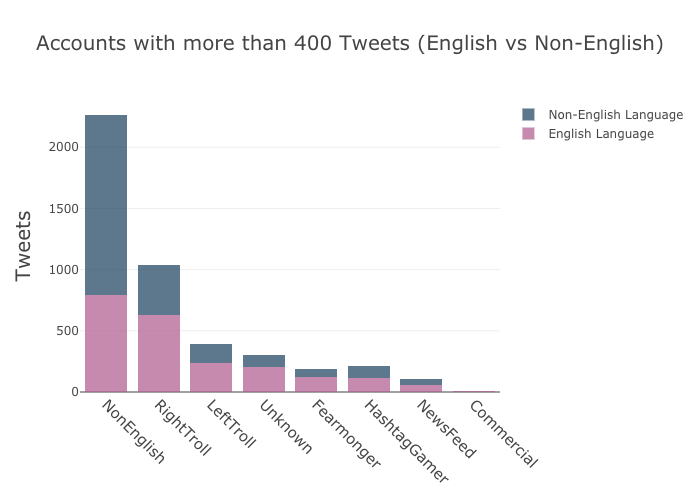

In [116]:
trace5 = go.Bar(
    x = account_type_H,
    y = values_H,
    name ='English Language',
    marker=dict(color='rgb(175, 88, 141)'),
    opacity = .7
)

trace6 = go.Bar(
    x=account_type_I,
    y=values_I,
    name='Non-English Language',
    marker=dict(color='rgb(23,62,90)'),
    opacity = .7
)

data = [trace5, trace6]

layout = go.Layout(
    title = dict(text = 'Accounts with more than 400 Tweets (English vs Non-English)', font = dict(size = 20)),
    xaxis = dict(
        tickangle = 45, 
        tickfont = dict(size = 15),
        automargin = True),
    yaxis = dict(title = dict(text = 'Tweets', font = dict(size = 20))),
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
img_bytes = pio.to_image(fig, format='png')
Image(img_bytes)

# py.iplot(fig, filename='bar2.html')